In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("df_cleaned_new.csv")


In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Job_Code,hourly,employer_provided,min_salary,...,AWS,Tableau,Hadoop,experience,C_lang,Java,app,debug,HTML,object
0,Data Analyst,$78K - $129K (Glassdoor est.),"Wednesday, October 14, 2020\n\n \nThe Data Sci...",3.3,CNA Corporation\n3.3,"Arlington, VA",AN,0,0,78,...,1,0,0,0,0,0,0,0,0,0
1,Data Analyst,$37K - $66K (Glassdoor est.),It's fun to work in a company where people tru...,3.1,The Vincit Group\n3.1,"Chattanooga, TN",AN,0,0,37,...,0,0,0,1,0,0,0,0,0,0
2,Data Analyst,$97K - $153K (Glassdoor est.),Associate Data Analyst (Entry Level)\n\nAre yo...,4.3,Insperity\n4.3,"Marlborough, MA",AN,0,0,97,...,0,0,0,0,0,0,0,0,0,0
3,Data Analyst,$97K - $153K (Glassdoor est.),We Embrace Change – We Pursue (Pear)fection – ...,3.5,Function of Beauty\n3.5,"New York, NY",AN,0,0,97,...,0,1,0,1,0,0,0,0,0,0
4,Data Analyst,$38K - $68K (Glassdoor est.),"Entry Level Analyst | Cambridge, MA, United St...",4.9,Hopjump\n4.9,"Cambridge, MA",AN,0,0,38,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'experience', 'C_lang', 'Java', 'app', 'debug', 'HTML',
       'object'],
      dtype='object')

In [8]:
df.job_state.value_counts()

 MD               121
 CA               114
 VA                72
 NY                59
 TX                57
 MA                50
 FL                48
 CO                30
 AZ                26
 PA                22
 OH                18
 WA                16
 NJ                15
 IL                14
 TN                13
 NC                13
 NE                13
 GA                12
 MO                12
United States      11
 UT                11
Remote             10
 OR                10
 MS                 9
 IN                 8
 RI                 7
 AL                 7
 MI                 6
 MN                 5
 KY                 5
 KS                 5
 VT                 4
 SC                 4
 NH                 3
 DC                 3
 MT                 3
 WI                 3
Florida             2
Oregon              2
 ND                 2
 ME                 1
 NV                 1
Massachusetts       1
Louisiana           1
 WV                 1
 DE       

In [12]:
def state_change(state):
    x = state.strip()
    if x.lower() == "virginia":
        return "VA"
    elif x.lower()  == "maryland":
        return "MD"
    elif x.lower() == "new jersey":
        return "NJ"
    elif x.lower()  == "louisiana":
        return "LA"
    elif x.lower() == "arapahoe":
        return "CO"
    elif x.lower() == "massachusetts":
        return "MA"
    elif x.lower() == "oregon":
        return "OR"
    elif x.lower() == "florida":
        return "FL"
    elif x.lower() == "dekalb":
        return "GA"
    elif x.lower() == "california":
        return "CA"
    elif x.lower() == "new york state":
        return "NY"
    else:
        return x

In [13]:
df.job_state = df.job_state.apply(state_change)

In [14]:
df.job_state.value_counts()

MD               122
CA               115
VA                73
NY                60
TX                57
MA                51
FL                50
CO                30
AZ                26
PA                22
OH                18
WA                16
NJ                15
IL                14
NE                13
NC                13
TN                13
MO                12
GA                12
OR                12
UT                11
United States     11
Remote            10
MS                 9
IN                 8
RI                 7
AL                 7
MI                 6
KY                 5
KS                 5
MN                 5
VT                 4
SC                 4
NH                 3
WI                 3
DC                 3
MT                 3
LA                 2
ND                 2
NV                 1
WV                 1
DE                 1
NM                 1
ME                 1
Name: job_state, dtype: int64

In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [17]:
df['min_salary'] = df.apply(lambda x: x['min_salary'] * 2 if x['hourly'] == 1 else x['min_salary'], axis = 1)
df['max_salary'] = df.apply(lambda x: x['max_salary'] * 2 if x['hourly'] == 1 else x['max_salary'], axis = 1)
df['avg_salary'] = df.apply(lambda x: x['avg_salary'] * 2 if x['hourly'] == 1 else x['avg_salary'], axis = 1)


In [20]:
df[df.hourly == 1][['hourly','min_salary','max_salary','avg_salary']]

,hourly,min_salary,max_salary,avg_salary
99,1,96,152,124.0
115,1,88,132,110.0
117,1,68,112,90.0
118,1,68,112,90.0
119,1,124,208,166.0
120,1,124,208,166.0
289,1,100,168,134.0
290,1,100,168,134.0
291,1,100,168,134.0
292,1,100,168,134.0


In [23]:
df.company_text

0                       CNA Corporation\n
1                      The Vincit Group\n
2                             Insperity\n
3                    Function of Beauty\n
4                               Hopjump\n
                      ...                
852    Applied Research Associates, Inc\n
853               VMR Strategic Solutions
854         3d AXS Metal Printing Systems
855                              IDEMIA\n
856               L3Harris Technologies\n
Name: company_text, Length: 857, dtype: object

In [26]:
df.company_text = df.company_text.apply(lambda x: str(x).replace("\n",""))

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'experience', 'C_lang', 'Java', 'app', 'debug', 'HTML',
       'object'],
      dtype='object')

In [28]:
df.company_text

0                       CNA Corporation
1                      The Vincit Group
2                             Insperity
3                    Function of Beauty
4                               Hopjump
                     ...               
852    Applied Research Associates, Inc
853             VMR Strategic Solutions
854       3d AXS Metal Printing Systems
855                              IDEMIA
856               L3Harris Technologies
Name: company_text, Length: 857, dtype: object

In [29]:
skills = ['python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object']


In [30]:
DS_sals = df.apply(lambda x: x['avg_salary'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_sals = DS_sals[DS_sals != -1]
DS_sals_avg = DS_sals.mean()
DS_sals_avg

82.6470588235294

In [32]:
SE_sals = df.apply(lambda x: x['avg_salary'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_sals = SE_sals[SE_sals != -1]
SE_sals_avg = SE_sals.mean()
SE_sals_avg

73.65335051546391

In [33]:
AN_sals = df.apply(lambda x: x['avg_salary'] if x['Job_Code'] == 'AN' else -1, axis = 1)
AN_sals = AN_sals[AN_sals != -1]
AN_sals_avg = AN_sals.mean()
AN_sals_avg

70.61261261261261

Text(0, 0.5, 'Number of Job Posts')

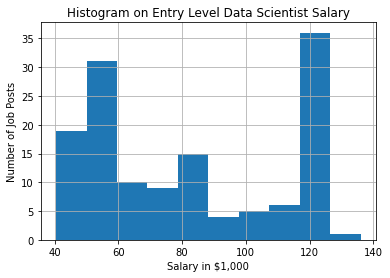

In [108]:
DS_sals.hist()
plt.title("Histogram on Entry Level Data Scientist Salary")
plt.xlabel("Salary in $1,000")
plt.ylabel("Number of Job Posts")

Text(0, 0.5, 'Number of Job Posts')

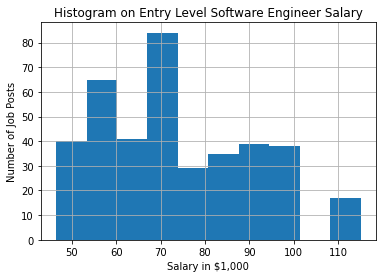

In [109]:
SE_sals.hist()
plt.title("Histogram on Entry Level Software Engineer Salary")
plt.xlabel("Salary in $1,000")
plt.ylabel("Number of Job Posts")

Text(0, 0.5, 'Number of Job Posts')

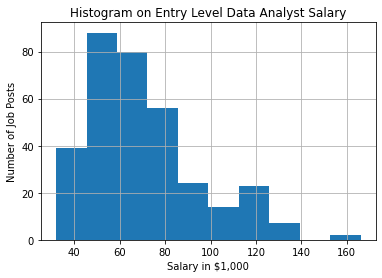

In [107]:
AN_sals.hist()
plt.title("Histogram on Entry Level Data Analyst Salary")
plt.xlabel("Salary in $1,000")
plt.ylabel("Number of Job Posts")

<AxesSubplot:title={'center':'Box Plots on Entry Level Salary by Job Type'}, ylabel='Salary in $1,000'>

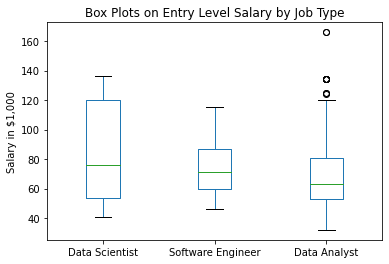

In [106]:
combine = pd.concat([DS_sals,SE_sals,AN_sals],axis=1)
combine = combine.rename(index=str, columns={0: "Data Scientist", 1:"Software Engineer", 2:"Data Analyst"})
combine.plot.box(title='Box Plots on Entry Level Salary by Job Type', ylabel='Salary in $1,000')

In [42]:
DS_sals.describe()


count    136.000000
mean      82.647059
std       30.471305
min       40.500000
25%       53.500000
50%       75.750000
75%      120.000000
max      136.000000
dtype: float64

In [44]:
SE_sals.describe()

count    388.000000
mean      73.653351
std       17.274432
min       46.500000
25%       60.000000
50%       71.000000
75%       87.000000
max      115.000000
dtype: float64

In [45]:
AN_sals.describe()

count    333.000000
mean      70.612613
std       24.618874
min       32.000000
25%       53.000000
50%       63.000000
75%       80.500000
max      166.000000
dtype: float64

In [86]:
DS_state = df.apply(lambda x: x['job_state'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_state = df.apply(lambda x: -1 if 'United States' in x['job_state'] or 'Remote' in x['job_state'] else x['job_state'], axis = 1)
DS_state = DS_state[DS_state != -1]

SE_state = df.apply(lambda x: x['job_state'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_state = df.apply(lambda x: -1 if 'United States' in x['job_state'] or 'Remote' in x['job_state'] else x['job_state'], axis = 1)
SE_state = SE_state[SE_state != -1]

AN_state = df.apply(lambda x: x['job_state'] if x['Job_Code'] == 'AN' else -1, axis = 1)
AN_state = df.apply(lambda x: -1 if 'United States' in x['job_state'] or 'Remote' in x['job_state'] else x['job_state'], axis = 1)
AN_state = AN_state[AN_state != -1]

In [87]:
DS_state.value_counts()

MD    122
CA    115
VA     73
NY     60
TX     57
MA     51
FL     50
CO     30
AZ     26
PA     22
OH     18
WA     16
NJ     15
IL     14
NE     13
NC     13
TN     13
MO     12
GA     12
OR     12
UT     11
MS      9
IN      8
RI      7
AL      7
MI      6
MN      5
KY      5
KS      5
SC      4
VT      4
MT      3
WI      3
NH      3
DC      3
ND      2
LA      2
ME      1
WV      1
DE      1
NM      1
NV      1
dtype: int64

In [88]:
SE_state.value_counts()

MD    122
CA    115
VA     73
NY     60
TX     57
MA     51
FL     50
CO     30
AZ     26
PA     22
OH     18
WA     16
NJ     15
IL     14
NE     13
NC     13
TN     13
MO     12
GA     12
OR     12
UT     11
MS      9
IN      8
RI      7
AL      7
MI      6
MN      5
KY      5
KS      5
SC      4
VT      4
MT      3
WI      3
NH      3
DC      3
ND      2
LA      2
ME      1
WV      1
DE      1
NM      1
NV      1
dtype: int64

In [89]:
AN_state.value_counts()

MD    122
CA    115
VA     73
NY     60
TX     57
MA     51
FL     50
CO     30
AZ     26
PA     22
OH     18
WA     16
NJ     15
IL     14
NE     13
NC     13
TN     13
MO     12
GA     12
OR     12
UT     11
MS      9
IN      8
RI      7
AL      7
MI      6
MN      5
KY      5
KS      5
SC      4
VT      4
MT      3
WI      3
NH      3
DC      3
ND      2
LA      2
ME      1
WV      1
DE      1
NM      1
NV      1
dtype: int64

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [58]:
skills

['python',
 'masters',
 'statistic',
 'SQL',
 'spark',
 'AWS',
 'Tableau',
 'Hadoop',
 'C_lang',
 'Java',
 'app',
 'debug',
 'HTML',
 'object']

In [59]:
DS_skills = ['python', 'masters','statistic','SQL','spark','AWS','Tableau',
 'Hadoop']
#DS_skills_dat = 
SE_skills = ['C_lang', 'Java', 'app', 'debug', 'HTML', 'object']
DS_sals_df = DS_sals.to_frame()
SE_sals_df = SE_sals.to_frame()



In [60]:
DS_state_sal = df[df.Job_Code == "DS"][['job_state','avg_salary']]
SE_state_sal = df[df.Job_Code == "SE"][['job_state','avg_salary']]
AN_state_sal = df[df.Job_Code == "AN"][['job_state','avg_salary']]

In [61]:
DS_state_sal = DS_state_sal[DS_state_sal.job_state != "Remote"]
DS_state_sal = DS_state_sal[DS_state_sal.job_state != "United States"]
DS_state_indsal = DS_state_sal.sort_values(by=['avg_salary'], ascending = False)
DS_state_indsal20 = DS_state_indsal[:20]
State_DS = DS_state_sal.job_state.unique()
#len(highState_DS)
#State_DS
#DS_state_indsal20

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'States Paying Top 20 Salaries - Entry Level Data Scientist')]

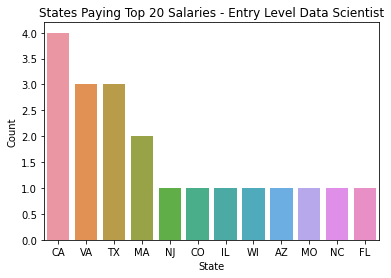

In [63]:
bplot = sns.barplot(x= DS_state_indsal20.job_state.value_counts().index, y= DS_state_indsal20.job_state.value_counts())
bplot.set(xlabel='State', ylabel='Count', title='States Paying Top 20 Salaries - Entry Level Data Scientist')

In [64]:
test = DS_state_sal[DS_state_sal.job_state == "MA"]
test = test.avg_salary.apply(lambda x: int(x))
#test.groupby('avg_salary').mean()
test
test.mean()

81.0

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average Salary in $1,000'),
 Text(0.5, 1.0, 'Top 20 States with Highest Average Salary in Entry Data Scientist Positions')]

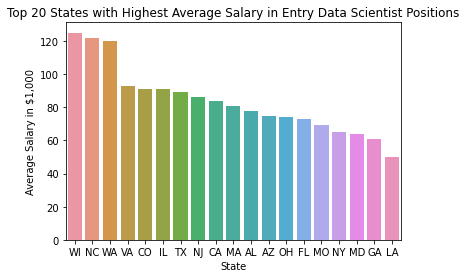

In [90]:
DS_sal_by_state = dict()
#State_DS = list(State_DS)
for state in State_DS:
    x = DS_state_sal[DS_state_sal.job_state == state]
    x = x.avg_salary.apply(lambda x: int(x))
    DS_sal_by_state[state] = round(x.mean(),2)

DS_sal_by_state = pd.DataFrame.from_dict(data = DS_sal_by_state, dtype=np.int8, orient='index', columns = ['average salary (K)'])
DS_sal_by_state = DS_sal_by_state.sort_values(by=['average salary (K)'], ascending = False)
DS_sal_by_state_high20 = DS_sal_by_state[:20]
#DS_sal_by_state_high20
bplot1 = sns.barplot(x= DS_sal_by_state_high20.index, y = DS_sal_by_state_high20['average salary (K)'])
bplot1.set(xlabel='State', ylabel='Average Salary in $1,000', title='Top 20 States with Highest Average Salary in Entry Data Scientist Positions')

In [40]:
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "Remote"]
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "United States"]
SE_state_sal = SE_state_sal.sort_values(by=['avg_salary'], ascending = False)
SE_state_sal_high = SE_state_sal[:20]
highState_SE = SE_state_sal_high.job_state.unique()
len(highState_SE)
highState_SE
SE_state_sal_high

,job_state,avg_salary
905,WA,126.5
957,CA,120.5
949,OH,120.5
942,CA,120.5
943,MD,120.5
944,MI,120.5
945,FL,120.5
946,OR,120.5
947,OH,120.5
950,NC,120.5


In [41]:
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "Remote"]
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "United States"]
SE_state_indsal = SE_state_sal.sort_values(by=['avg_salary'], ascending = False)
SE_state_indsal20 = SE_state_indsal[:20]
State_SE = SE_state_sal.job_state.unique()

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'States Paying Top 20 Salaries - Entry Software Engineer Positions')]

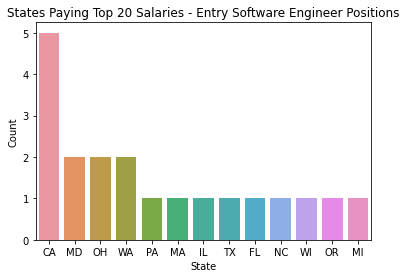

In [42]:
bplot2 = sns.barplot(x= SE_state_indsal20.job_state.value_counts().index, y= SE_state_indsal20.job_state.value_counts())
bplot2.set(xlabel='State', ylabel='Count', title='States Paying Top 20 Salaries - Entry Software Engineer Positions')

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average Salary in $1,000'),
 Text(0.5, 1.0, 'Top 20 States with Highest Average Salary in Entry Software Engineer Positions')]

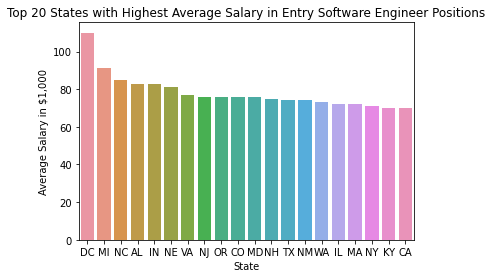

In [91]:
SE_sal_by_state = dict()
#State_SE = list(State_SE)
for state in SE_state:
    x = SE_state_sal[SE_state_sal.job_state == state]
    x = x.avg_salary.apply(lambda x: int(x))
    SE_sal_by_state[state] = round(x.mean(),2)

SE_sal_by_state = pd.DataFrame.from_dict(data = SE_sal_by_state, dtype=np.int8, orient='index', columns = ['average salary (K)'])
SE_sal_by_state = SE_sal_by_state.sort_values(by=['average salary (K)'], ascending = False)
SE_sal_by_state_high20 = SE_sal_by_state[:20]
SE_sal_by_state_high20
bplot3 = sns.barplot(x= SE_sal_by_state_high20.index, y = SE_sal_by_state_high20['average salary (K)'])
bplot3.set(xlabel='State', ylabel='Average Salary in $1,000', title='Top 20 States with Highest Average Salary in Entry Software Engineer Positions')

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average Salary in $1,000'),
 Text(0.5, 1.0, 'Top 20 States with Highest Average Salary in Entry Data Analyst Positions')]

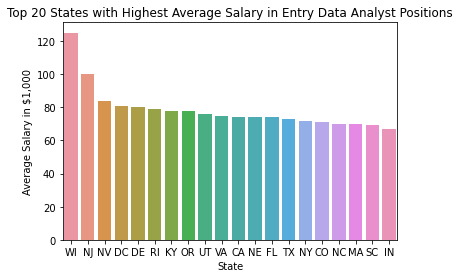

In [92]:
AN_sal_by_state = dict()
#State_AN = list(State_AN)
for state in AN_state:
    x = AN_state_sal[AN_state_sal.job_state == state]
    x = x.avg_salary.apply(lambda x: int(x))
    AN_sal_by_state[state] = round(x.mean(),2)

AN_sal_by_state = pd.DataFrame.from_dict(data = AN_sal_by_state, dtype=np.int8, orient='index', columns = ['average salary (K)'])
AN_sal_by_state = AN_sal_by_state.sort_values(by=['average salary (K)'], ascending = False)
AN_sal_by_state_high20 = AN_sal_by_state[:20]
AN_sal_by_state_high20
bplot3 = sns.barplot(x= AN_sal_by_state_high20.index, y = AN_sal_by_state_high20['average salary (K)'])
bplot3.set(xlabel='State', ylabel='Average Salary in $1,000', title='Top 20 States with Highest Average Salary in Entry Data Analyst Positions')

In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [95]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from nltk.tokenize import *

In [96]:
DS_jobdesc = df.apply(lambda x: x['Job Description'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_jobdesc = DS_jobdesc[DS_jobdesc != -1]


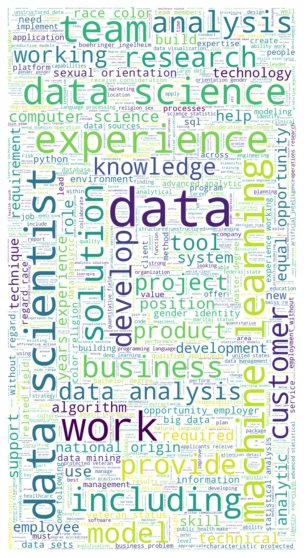

In [97]:
words = " ".join(DS_jobdesc)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [98]:
SE_jobdesc = df.apply(lambda x: x['Job Description'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_jobdesc = SE_jobdesc[SE_jobdesc != -1]

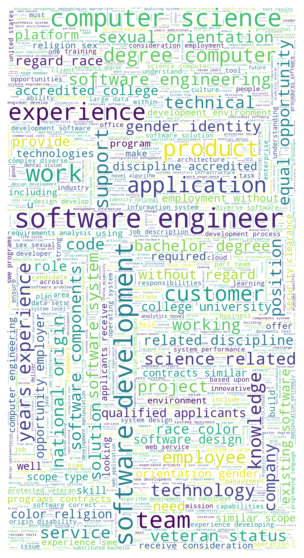

In [99]:
words = " ".join(SE_jobdesc)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [101]:
AN_jobdesc = df.apply(lambda x: x['Job Description'] if x['Job_Code'] == 'AN' else -1, axis = 1)
AN_jobdesc = AN_jobdesc[AN_jobdesc != -1]

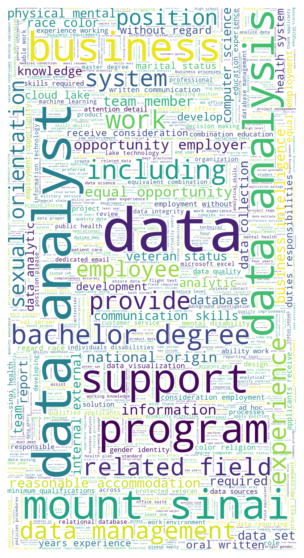

In [102]:
words = " ".join(AN_jobdesc)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [103]:
df.to_csv('df_cleaned.csv_new', index = False)